# Download data from Kaggle

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aditivijaykulkarni","key":"8b1a498f4da2b10723fa3ea7cf8d8ae3"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

 95% 1.00M/1.05M [00:00<00:00, 2.00MB/s]
100% 1.05M/1.05M [00:00<00:00, 2.09MB/s]


# Extract data and install packages (regardless of data acquisition method)

In [6]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
  inflating: prompts_test.csv        
  inflating: prompts_train.csv       
  inflating: sample_submission.csv   
  inflating: summaries_test.csv      
  inflating: summaries_train.csv     


In [7]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install pyphen
!pip install pyspellchecker
!pip install language_tool_python
### END

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.8 MB/s eta 0:00:00


## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [8]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('popular')
import pyphen
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from spellchecker import SpellChecker
from language_tool_python import LanguageTool
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
###

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [9]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [10]:
# reading two csv files

data1 = pd.read_csv('summaries_train.csv')
data2 = pd.read_csv('prompts_train.csv')

# using merge function
mergedDF = pd.merge(data1, data2,
                   on='prompt_id')

mergedDF = mergedDF[use_cols]
mergedDF.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


In [11]:
from pandas.core.reshape.merge import string
# convert column data types to string

mergedDF[['student_id', 'prompt_id', 'text', 'prompt_question', 'prompt_title', 'prompt_text']] = mergedDF[['student_id', 'prompt_id', 'text', 'prompt_question', 'prompt_title', 'prompt_text']].astype('string')

mergedDF.dtypes


student_id          string
prompt_id           string
text                string
content            float64
wording            float64
prompt_question     string
prompt_title        string
prompt_text         string
dtype: object

## **Section 2: Features (Q2 and Q3, 25 points total)**



In [12]:
# Construct a table of five features (really 7) from the text for each instance: (10 points)
# Number of words in student response (text) and prompt (prompt_text)
# Number of distinct words in student response (text) and prompt (prompt_text)
# Number of words common to student response (text) and prompt (prompt_text)
# Number of words common to student response (text) and prompt_question
# Number of words common to student response (text) and prompt_title

d = {
    'student_id': mergedDF["student_id"],
    'no_of_words_in_text': mergedDF["text"].str.split().apply(len),
    'no_of_words_in_prompt_text': mergedDF["prompt_text"].str.split().apply(len),
    'no_of_distinct_words_in_text': mergedDF["text"].str.lower().str.split().apply(set).apply(len),
    'no_of_distinct_words_in_prompt_text': mergedDF["prompt_text"].str.lower().str.split().apply(set).apply(len),
    'no_of_words_in_text_and_prompt_text': mergedDF["text"].str.split().apply(len) + mergedDF["prompt_text"].str.split().apply(len),
    'no_of_distinct_words_in_text_and_prompt_text': mergedDF['text'].str.lower().str.split().apply(set).apply(len) + mergedDF["prompt_text"].str.lower().str.split().apply(set).apply(len),
    'no_of_words_common_to_text_and_prompt_text': mergedDF.apply(lambda row: len(set(word.lower() for word in row["text"].split()) & set(word.lower() for word in row["prompt_text"].split())), axis=1),
    'no_of_words_common_to_text_and_prompt_question': mergedDF.apply(lambda row: len(set(word.lower() for word in row["text"].split()) & set(word.lower() for word in row["prompt_question"].split())), axis=1),
    'no_of_words_common_to_text_and_prompt_title': mergedDF.apply(lambda row: len(set(word.lower() for word in row["text"].split()) & set(word.lower() for word in row["prompt_title"].split())), axis=1)
}

df = pd.DataFrame(data=d)

df.head()


,student_id,no_of_words_in_text,no_of_words_in_prompt_text,no_of_distinct_words_in_text,no_of_distinct_words_in_prompt_text,no_of_words_in_text_and_prompt_text,no_of_distinct_words_in_text_and_prompt_text,no_of_words_common_to_text_and_prompt_text,no_of_words_common_to_text_and_prompt_question,no_of_words_common_to_text_and_prompt_title
0,000e8c3c7ddb,61,596,49,287,657,336,22,7,3
1,0070c9e7af47,203,596,134,287,799,421,47,9,3
2,0095993991fe,60,596,48,287,656,335,29,7,3
3,00c20c6ddd23,76,596,57,287,672,344,35,9,3
4,00d40ad10dc9,27,596,24,287,623,311,16,7,3


In [13]:
# Now fortify this list with at least five other numerical features.
# Consider readability indices, counts of words from particular classes (e.g character length, part of speech, popularity).
# Use your imagination as to what might be helpful for identifying well written summaries of texts.

# total sentences
df['total_sentences_in_text'] = mergedDF['text'].apply(lambda text: len(nltk.sent_tokenize(text)))

# total syllables
dictionary = pyphen.Pyphen(lang='en')
df['total_syllables_in_text'] = mergedDF['text'].apply(lambda text: sum(len(dictionary.inserted(word).split('-')) for word in text.split()))

# readability index Flesch–Kincaid grade level
df['readability_index'] =  206.835 - 1.015 * (df['no_of_words_in_text']/df['total_sentences_in_text']) - 84.6 * (df['total_syllables_in_text']/df['no_of_words_in_text']) - 15.59

# Type-Token Ratio (TTR)/Unique words
df['type_token_ratio'] = df['no_of_distinct_words_in_text'] / df['no_of_words_in_text']

# Number of words in text without punctuation and stop words
df['num_words_no_punctuation_stopwords'] = mergedDF['text'].apply(lambda x: len([word for word in nltk.word_tokenize(x) if word.isalnum() and word.lower() not in nltk.corpus.stopwords.words('english')]))

# POS Tagging
df['pos_tags'] = mergedDF['text'].apply(lambda x: [tag for word, tag in nltk.pos_tag(nltk.word_tokenize(x))])

# Number of misspelled words
spell = SpellChecker()
count_misspelled_words = lambda text: len(spell.unknown(text.split()))
df['misspelled_word_count'] = mergedDF['text'].apply(count_misspelled_words)

# Number of grammatical errors
tool = LanguageTool('en-US')
df['grammar_error_count'] = mergedDF['text'].apply(lambda text: len(tool.check(text)))

df.head()


INFO:language_tool_python.download_lt:Unzipping /tmp/tmppeptgz1b.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


,student_id,no_of_words_in_text,no_of_words_in_prompt_text,no_of_distinct_words_in_text,no_of_distinct_words_in_prompt_text,no_of_words_in_text_and_prompt_text,no_of_distinct_words_in_text_and_prompt_text,no_of_words_common_to_text_and_prompt_text,no_of_words_common_to_text_and_prompt_question,no_of_words_common_to_text_and_prompt_title,total_sentences_in_text,total_syllables_in_text,readability_index,type_token_ratio,num_words_no_punctuation_stopwords,pos_tags,misspelled_word_count,grammar_error_count
0,000e8c3c7ddb,61,596,49,287,657,336,22,7,3,4,84,59.267889,0.803279,36,"[DT, JJ, NN, VBD, DT, JJ, VB, WRB, NNS, VBD, T...",5,3
1,0070c9e7af47,203,596,134,287,799,421,47,9,3,14,283,58.587599,0.660099,108,"[DT, NNP, NNP, VBD, RB, IN, DT, NNS, RB, VBD, ...",29,15
2,0095993991fe,60,596,48,287,656,335,29,7,3,3,82,55.325000,0.800000,30,"[DT, JJ, NN, RB, VBD, IN, DT, NN, IN, DT, NN, ...",6,3
3,00c20c6ddd23,76,596,57,287,672,344,35,9,3,3,105,48.650088,0.750000,38,"[DT, NNS, VBD, RB, IN, WRB, RB, WRB, JJ, NNS, ...",14,4
4,00d40ad10dc9,27,596,24,287,623,311,16,7,3,2,36,64.742500,0.888889,15,"[DT, JJ, NN, VBD, RB, RB, JJ, TO, DT, NNS, VBP...",3,3


## **Section 3: Content and Wording (Q4, 10 points)**

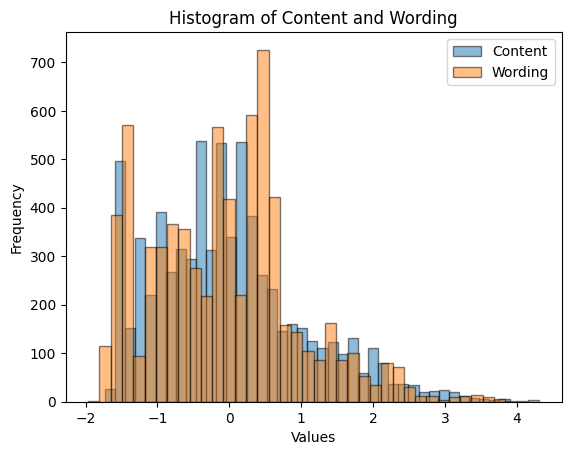

In [14]:
# Look at the distributions of scores for content and wording, as histograms and scatterplots?
# What is the range of values here? How well correlated are they?
# Do the shapes of these distributions differ for the different prompts?  (10 points)

# histogram of content and wording
plt.hist(mergedDF['content'], bins=40, alpha=0.5, label='Content', edgecolor='black')
plt.hist(mergedDF['wording'], bins=40, alpha=0.5, label='Wording', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Content and Wording')
plt.show()

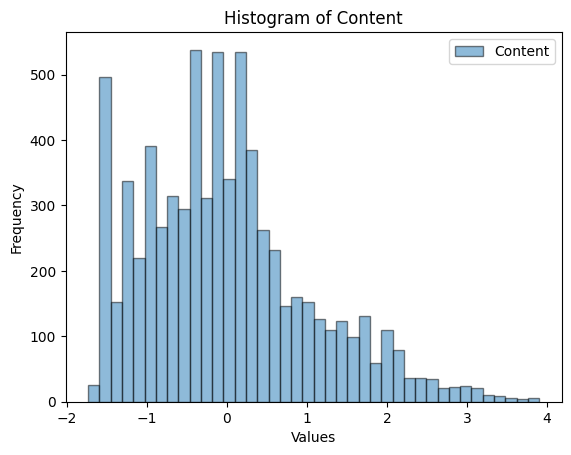

In [15]:
# histogram of content

plt.hist(mergedDF['content'], bins=40, alpha=0.5, label='Content', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Content')
plt.show()

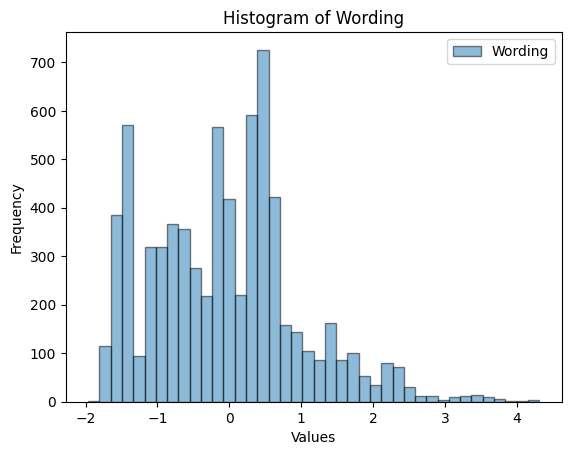

In [16]:
# histogram of wording

plt.hist(mergedDF['wording'], bins=40, alpha=0.5, label='Wording', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Wording')
plt.show()

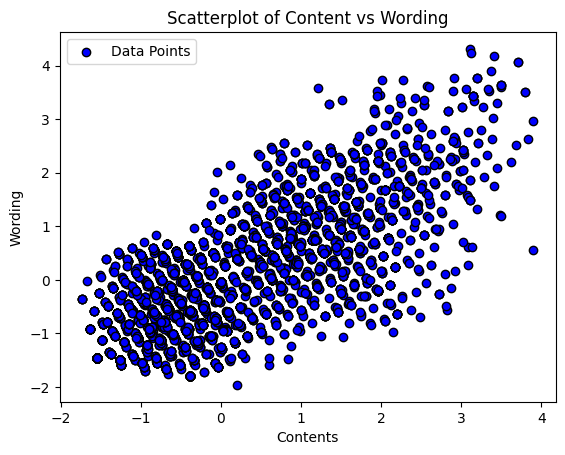

In [17]:
# scatterplot of content vs wording
plt.scatter(mergedDF['content'], mergedDF['wording'], label='Data Points', color='blue', marker='o', edgecolor='black')

plt.xlabel('Contents')
plt.ylabel('Wording')
plt.title('Scatterplot of Content vs Wording')
plt.legend()
plt.show()

In [18]:
# Find the range of 'Content'
content_range = mergedDF['content'].max() - mergedDF['content'].min()

print("Range of 'Content':", content_range)

wording_range = mergedDF['wording'].max() - mergedDF['wording'].min()

print("Range of 'Wording':", wording_range)

Range of 'Content': 5.630185556899
Range of 'Wording': 6.27330694515344


In [19]:
# find the correlation of content and wording

correlation = mergedDF['content'].corr(mergedDF['wording'])
print(f'Correlation between cotent and wording - {correlation}')

# Content and wording seem to have a strong positive correlation which in turn translates to that if content is increasing, wording will too, increase.

Correlation between cotent and wording - 0.7513804859701969


<StringArray>
['814d6b', 'ebad26', '3b9047', '39c16e']
Length: 4, dtype: string


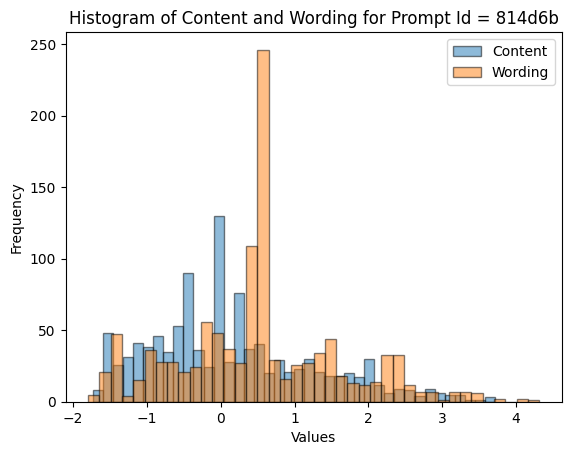

In [20]:
unique_prompt_ids = mergedDF['prompt_id'].unique()
print(unique_prompt_ids)

# histogram for prompt id = 814d6b
plt.hist(mergedDF[mergedDF['prompt_id'] == '814d6b']['content'], bins=40, alpha=0.5, label='Content', edgecolor='black')
plt.hist(mergedDF[mergedDF['prompt_id'] == '814d6b']['wording'], bins=40, alpha=0.5, label='Wording', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Content and Wording for Prompt Id = 814d6b')
plt.show()

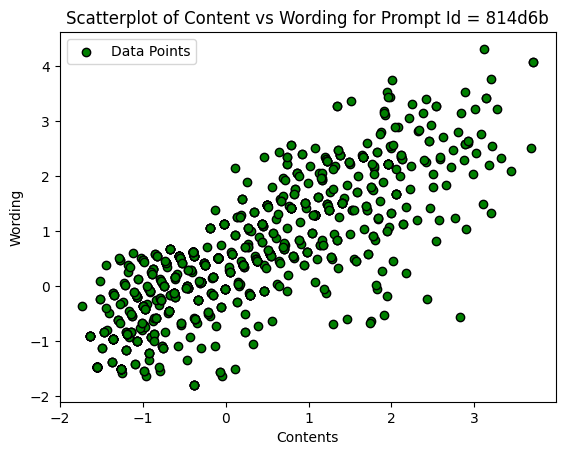

Range of 'Content': 5.4412334055625005
Range of 'Wording': 6.10618395484142
Correlation between content and wording for prompt id = 814d6b - 0.8137912322007284


In [21]:
# scatterplot for prompt id = 814d6b
plt.scatter(mergedDF[mergedDF['prompt_id'] == '814d6b']['content'], mergedDF[mergedDF['prompt_id'] == '814d6b']['wording'], label='Data Points', color='green', marker='o', edgecolor='black')

plt.xlabel('Contents')
plt.ylabel('Wording')
plt.title('Scatterplot of Content vs Wording for Prompt Id = 814d6b')
plt.legend()
plt.show()

# Find the range for prompt_id = 814d6b
content_range = mergedDF[mergedDF['prompt_id'] == '814d6b']['content'].max() - mergedDF[mergedDF['prompt_id'] == '814d6b']['content'].min()

print("Range of 'Content':", content_range)

wording_range = mergedDF[mergedDF['prompt_id'] == '814d6b']['wording'].max() - mergedDF[mergedDF['prompt_id'] == '814d6b']['wording'].min()

print("Range of 'Wording':", wording_range)

# find the correlation of content and wording for prompt_id = 814d6b

correlation = mergedDF[mergedDF['prompt_id'] == '814d6b']['content'].corr(mergedDF[mergedDF['prompt_id'] == '814d6b']['wording'])
print(f'Correlation between content and wording for prompt id = 814d6b - {correlation}')

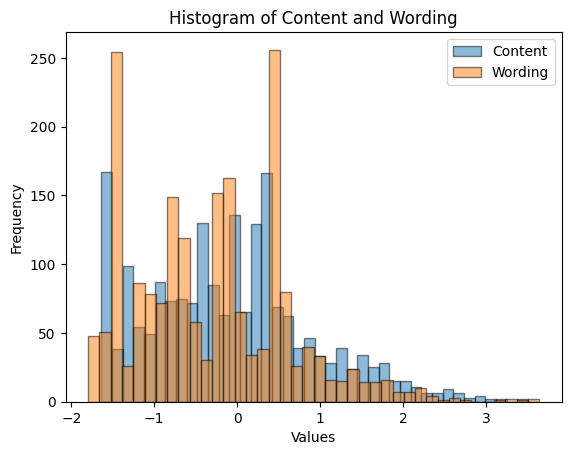

In [22]:
# histogram for prompt id = ebad26

plt.hist(mergedDF[mergedDF['prompt_id'] == 'ebad26']['content'], bins=40, alpha=0.5, label='Content', edgecolor='black')
plt.hist(mergedDF[mergedDF['prompt_id'] == 'ebad26']['wording'], bins=40, alpha=0.5, label='Wording', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Content and Wording')
plt.show()

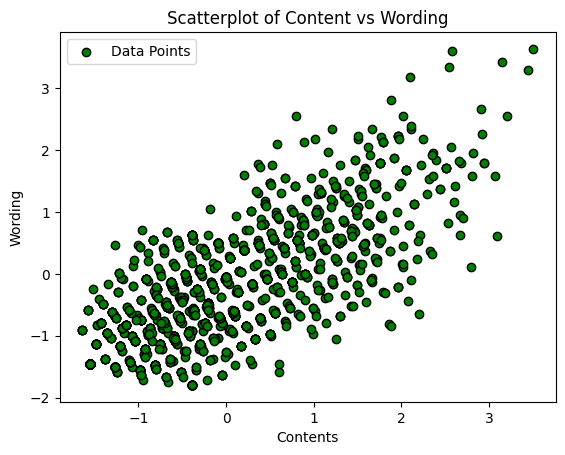

In [23]:
# scatterplot for prompt id = ebad26
plt.scatter(mergedDF[mergedDF['prompt_id'] == 'ebad26']['content'], mergedDF[mergedDF['prompt_id'] == 'ebad26']['wording'], label='Data Points', color='green', marker='o', edgecolor='black')

plt.xlabel('Contents')
plt.ylabel('Wording')
plt.title('Scatterplot of Content vs Wording')
plt.legend()
plt.show()

In [24]:
# Find the range for prompt_id = ebad26
content_range = mergedDF[mergedDF['prompt_id'] == 'ebad26']['content'].max() - mergedDF[mergedDF['prompt_id'] == 'ebad26']['content'].min()

print("Range of 'Content':", content_range)

wording_range = mergedDF[mergedDF['prompt_id'] == 'ebad26']['wording'].max() - mergedDF[mergedDF['prompt_id'] == 'ebad26']['wording'].min()

print("Range of 'Wording':", wording_range)

# find the correlation of content and wording for prompt_id = ebad26

correlation = mergedDF[mergedDF['prompt_id'] == 'ebad26']['content'].corr(mergedDF[mergedDF['prompt_id'] == 'ebad26']['wording'])
print(f'Correlation between content and wording - {correlation}')

Range of 'Content': 5.14173706736242
Range of 'Wording': 5.43361713252189
Correlation between content and wording - 0.7534131842752712


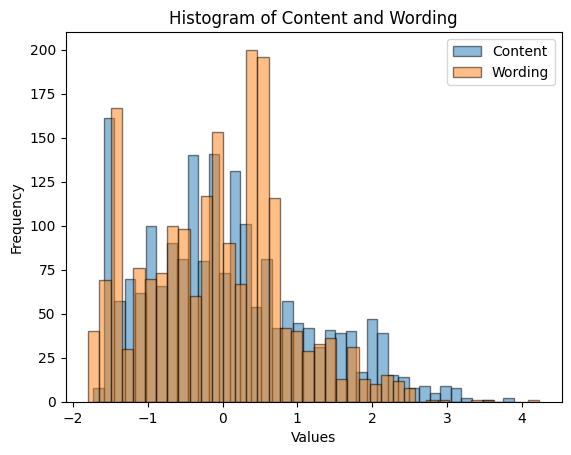

In [25]:
# histogram for prompt id = 3b9047

plt.hist(mergedDF[mergedDF['prompt_id'] == '3b9047']['content'], bins=40, alpha=0.5, label='Content', edgecolor='black')
plt.hist(mergedDF[mergedDF['prompt_id'] == '3b9047']['wording'], bins=40, alpha=0.5, label='Wording', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Content and Wording')
plt.show()

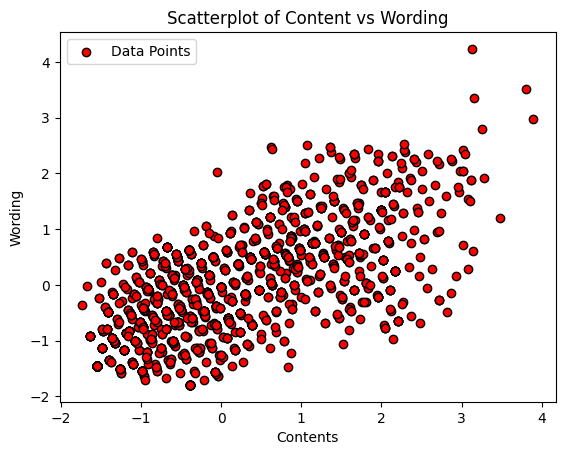

In [26]:
# scatterplot for prompt id = 3b9047

plt.scatter(mergedDF[mergedDF['prompt_id'] == '3b9047']['content'], mergedDF[mergedDF['prompt_id'] == '3b9047']['wording'], label='Data Points', color='red', marker='o', edgecolor='black')
plt.xlabel('Contents')
plt.ylabel('Wording')
plt.title('Scatterplot of Content vs Wording')
plt.legend()
plt.show()

In [27]:
# Find the range for prompt_id = 3b9047
content_range = mergedDF[mergedDF['prompt_id'] == '3b9047']['content'].max() - mergedDF[mergedDF['prompt_id'] == '3b9047']['content'].min()

print("Range of 'Content':", content_range)

wording_range = mergedDF[mergedDF['prompt_id'] == '3b9047']['wording'].max() - mergedDF[mergedDF['prompt_id'] == '3b9047']['wording'].min()

print("Range of 'Wording':", wording_range)

# find the correlation of content and wording for prompt_id = 3b9047

correlation = mergedDF[mergedDF['prompt_id'] == '3b9047']['content'].corr(mergedDF[mergedDF['prompt_id'] == '3b9047']['wording'])
print(f'Correlation between content and wording - {correlation}')

Range of 'Content': 5.62392964131342
Range of 'Wording': 6.02671635569877
Correlation between content and wording - 0.687493601347762


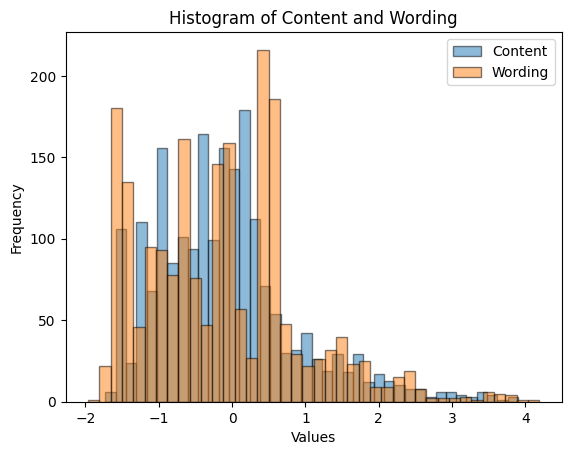

In [28]:
# histogram for prompt id = 39c16e

plt.hist(mergedDF[mergedDF['prompt_id'] == '39c16e']['content'], bins=40, alpha=0.5, label='Content', edgecolor='black')
plt.hist(mergedDF[mergedDF['prompt_id'] == '39c16e']['wording'], bins=40, alpha=0.5, label='Wording', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Content and Wording')
plt.show()

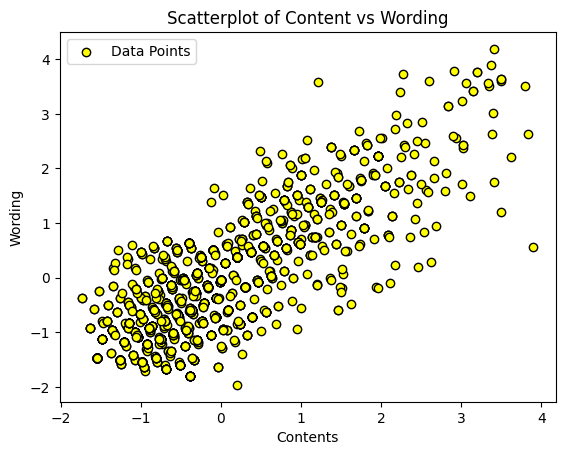

In [29]:
# scatterplot for prompt id = 39c16e

plt.scatter(mergedDF[mergedDF['prompt_id'] == '39c16e']['content'], mergedDF[mergedDF['prompt_id'] == '39c16e']['wording'], label='Data Points', color='yellow', marker='o', edgecolor='black')
plt.xlabel('Contents')
plt.ylabel('Wording')
plt.title('Scatterplot of Content vs Wording')
plt.legend()
plt.show()

In [30]:
# Find the range for prompt_id = 39c16e
content_range = mergedDF[mergedDF['prompt_id'] == '39c16e']['content'].max() - mergedDF[mergedDF['prompt_id'] == '39c16e']['content'].min()

print("Range of 'Content':", content_range)

wording_range = mergedDF[mergedDF['prompt_id'] == '39c16e']['wording'].max() - mergedDF[mergedDF['prompt_id'] == '39c16e']['wording'].min()

print("Range of 'Wording':", wording_range)

# find the correlation of content and wording for prompt_id = 39c16e

correlation = mergedDF[mergedDF['prompt_id'] == '39c16e']['content'].corr(mergedDF[mergedDF['prompt_id'] == '39c16e']['wording'])
print(f'Correlation between content and wording - {correlation}')

Range of 'Content': 5.630185556899
Range of 'Wording': 6.15001165042611
Correlation between content and wording - 0.8129110061670941


## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

In [31]:
# Which words are over-represented in good essays (as per content and wording) while being under-represented in bad ones?
# Conversely, which words appear disproportionately in the bad essays?
# What is an appropriate statistic to use here? (10 points)

def label_essay(row):
    if row['content'] > mergedDF['content'].median() and row['wording'] > mergedDF['wording'].median():
        return "good"
    else:
        return "bad"

df['label'] = mergedDF.apply(label_essay, axis=1)

# df.head()

good_essays = mergedDF[df['label'] == 'good']
bad_essays = mergedDF[df['label'] == 'bad']

good_word_counts = Counter(" ".join(good_essays['text']).lower().split())
bad_word_counts = Counter(" ".join(bad_essays['text']).lower().split())

# print(good_word_counts)
# print(bad_word_counts)

overrepresented_in_good = [word for word, count in good_word_counts.items() if count > bad_word_counts.get(word, 0)]
overrepresented_in_good = [word for word in overrepresented_in_good if word.lower() not in nltk.corpus.stopwords.words('english')]

overrepresented_in_bad = [word for word, count in bad_word_counts.items() if count > good_word_counts.get(word, 0)]
overrepresented_in_bad = [word for word in overrepresented_in_bad if word.lower() not in nltk.corpus.stopwords.words('english')]

# print("Words overrepresented in 'good' essays:")
print(overrepresented_in_good)

# print("\nWords overrepresented in 'bad' essays:")
print(overrepresented_in_bad)

#  This shows that spelling errors are more in bad_essays. We can consider that as part of feature set to improve performace of model.

['third', 'wave', 'experimentto', 'see', 'people', 'new', 'one', 'leader', 'government.', 'gained', 'popularity', 'wanted', 'try', 'students', 'follow', 'said', 'turning', 'eachother', 'higher', 'power.', 'many', 'blindly', 'following', 'developed', 'rapidly', 'genuinly', 'believed', 'best', 'course', 'grades,', 'acomplishments,', 'classparticipation/', 'behavior', 'improved', 'dramatically', 'since', 'experiment', 'began.', 'seem', 'consiquenses', 'eyes.', 'became', 'extremely', 'engaged', 'activites', 'inside', 'outside', 'classroom.', 'patriotic', '"movement".', 'history', 'class', 'grew', '200', 'days.', 'means', '170', 'joined', 'school', '"movement"', 'two', '85', 'day!', 'fifth', 'final', 'day', 'completley', 'wave"', 'movement', 'expell', 'democracy.', 'candidate', 'anounce', 'existance', 'television', 'five', 'days', 'success.', 'creater,', 'ron', 'jones,', 'gone', 'far', "everyone's", 'safety', 'shut', 'fake', 'organization', 'grown', 'lasted', 'week.', 'spiralled', 'american

## **Section 5: Three Interesting Plots (Q6, 15 points)**

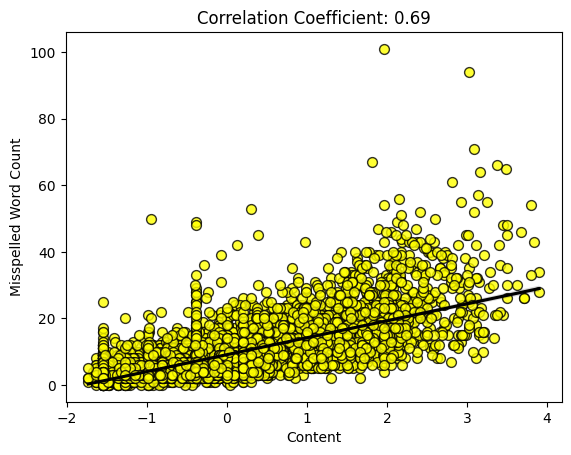

In [43]:
# Create three plots of your own using the dataset that you think reveal something very interesting.
# Explain what it is, and anything else you learned from your exploration. (15 points)

# correlation coefficient of content and misspelled_word_count
correlation_coefficient = mergedDF['content'].corr(df['misspelled_word_count'])

# Create a scatter plot with a regression line
sns.regplot(x = mergedDF['content'], y = df['misspelled_word_count'], data=df, scatter_kws={"s": 50, "edgecolor":'black'}, color='yellow', line_kws={"color": 'black'})
plt.title(f'Correlation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Content')
plt.ylabel('Misspelled Word Count')
plt.show()

# the grapth shows that content and missplled_word_count are strongly correlated.

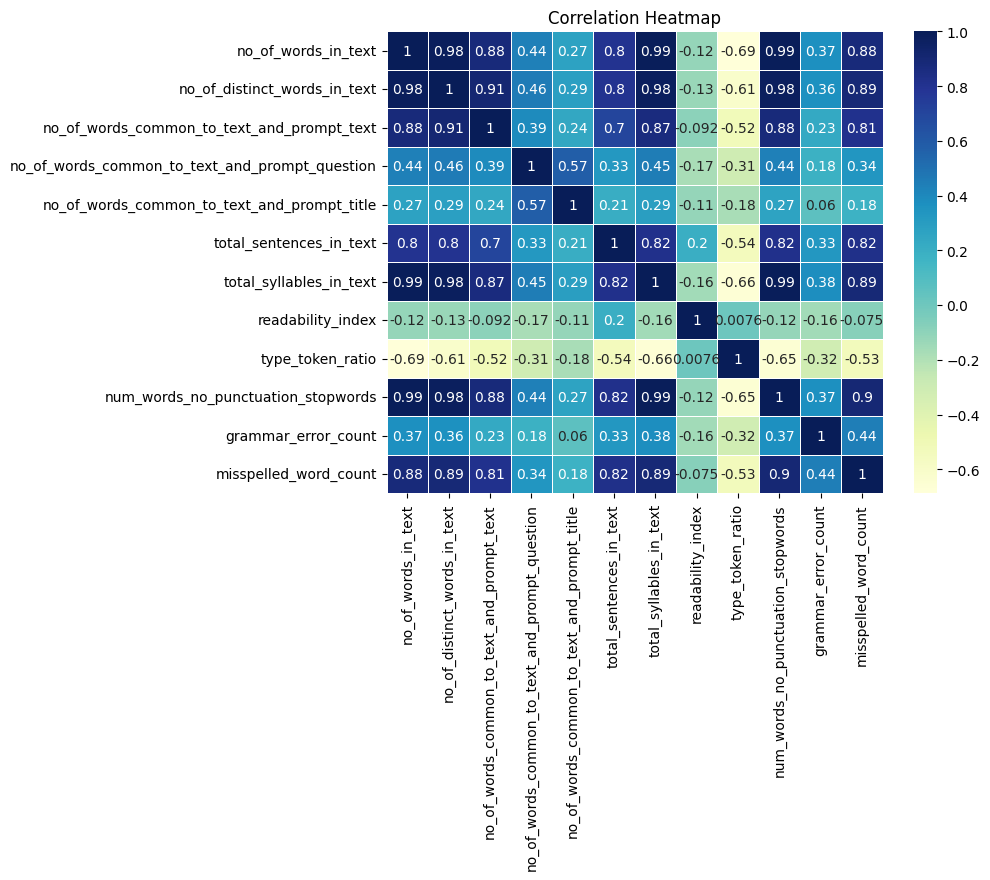

In [33]:
corr = df[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question',
        'no_of_words_common_to_text_and_prompt_title','total_sentences_in_text','total_syllables_in_text','readability_index','type_token_ratio',
        'num_words_no_punctuation_stopwords','grammar_error_count','misspelled_word_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")

plt.show()

# graph shows the correlation coefficient between all columns in the dataframe, this will help us design our model.

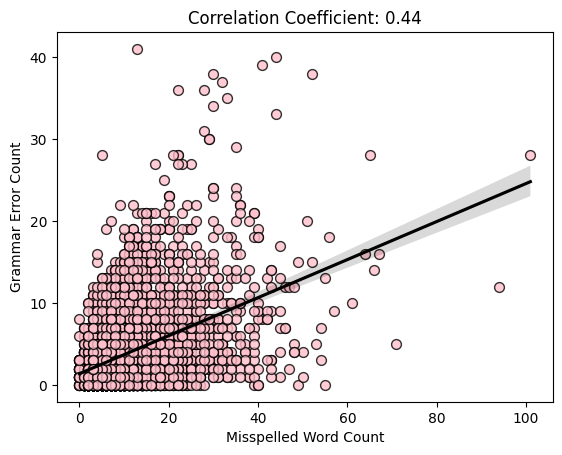

In [34]:
# correlation coefficient of content and misspelled_word_count
correlation_coefficient = df['misspelled_word_count'].corr(df['grammar_error_count'])

# Create a scatter plot with a regression line
sns.regplot(x = df['misspelled_word_count'], y = df['grammar_error_count'], data=df, scatter_kws={"s": 50, "edgecolor":'black'}, color='pink', line_kws={"color": 'black'})
plt.title(f'Correlation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Misspelled Word Count')
plt.ylabel('Grammar Error Count')
plt.show()

# The graph shows that as missplled_word_count increases, the students are more likely to make spelling mistakes too.

## **Section 6: Baseline Model (Q7, 10 points)**

In [35]:
# Now build a baseline model for this task. We will call this Model 0.
# You will train linear regression models for both content and wording on 80% of the training data and test it on the remaining 20% chosen at random.
# Use only the original five features described above. Report the mean squared error of each model. What do you make of the error rate? (10 points)

X = df[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question','no_of_words_common_to_text_and_prompt_title']]
y = mergedDF['content']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.33457265041187195


In [36]:
X = df[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question','no_of_words_common_to_text_and_prompt_title']]
y = mergedDF['wording']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Error rate is relatively more because we haven't added highly corrleated feautures and we haven't done any preprocessing.

Mean Squared Error: 0.500696389487351


## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

In [37]:
# The basic features as defined above are not really suited for the task.
# Features can be preprocessed (or cleaned) to improve them before feeding into the model (e.g. normalize them, do a special treatment of missing values, etc).
# This can significantly improve the performance of your model. Do preprocessing for all the features (the original five plus the extra you add).
# Explain what you did. (10 points)

# fill missing values
df['no_of_words_in_text'].fillna(df['no_of_words_in_text'].mean(), inplace=True)
df['no_of_distinct_words_in_text'].fillna(df['no_of_distinct_words_in_text'].mean(), inplace=True)
df['no_of_words_common_to_text_and_prompt_text'].fillna(df['no_of_words_common_to_text_and_prompt_text'].mean(), inplace=True)
df['no_of_words_common_to_text_and_prompt_question'].fillna(df['no_of_words_common_to_text_and_prompt_question'].mean(), inplace=True)
df['no_of_words_common_to_text_and_prompt_title'].fillna(df['no_of_words_common_to_text_and_prompt_title'].mean(), inplace=True)
df['total_sentences_in_text'].fillna(df['total_sentences_in_text'].mean(), inplace=True)
df['total_syllables_in_text'].fillna(df['total_syllables_in_text'].mean(), inplace=True)
df['readability_index'].fillna(df['readability_index'].mean(), inplace=True)
df['type_token_ratio'].fillna(df['type_token_ratio'].mean(), inplace=True)
df['num_words_no_punctuation_stopwords'].fillna(df['num_words_no_punctuation_stopwords'].mean(), inplace=True)
df['grammar_error_count'].fillna(df['grammar_error_count'].mean(), inplace=True)
df['misspelled_word_count'].fillna(df['misspelled_word_count'].mean(), inplace=True)

In [38]:
# Removing outliers

# Calculate Q1 and Q3
Q1 = mergedDF['content'].quantile(0.25)
Q3 = mergedDF['content'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = mergedDF[(mergedDF['content'] >= lower_bound) & (mergedDF['content'] <= upper_bound)]

Q1 = mergedDF['wording'].quantile(0.25)
Q3 = mergedDF['wording'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = mergedDF[(mergedDF['wording'] >= lower_bound) & (mergedDF['wording'] <= upper_bound)]
filtered_df_features = df[df['student_id'].isin(filtered_df['student_id'])]

# I have removed outliers, filled missing values with mean and normalized the data.

In [39]:
# For each of the two tasks (content and wording) create two models:
# Model 1 should use the cleaned features and linear regression for training. You can do some (potentially non-linear) scaling to keep the scores in range.
# Model 2 should use the cleaned features and an algorithm other than logistic regression (e.g. Random Forest, Nearest Neighbor, etc) for training.
# [Note: scikit-learn is a user-friendly library which is used to perform data loading, pre-processing, transformations, algorithms and metrics needed for Data Science and Machine learning]
# Compare their performance and explain your reasoning for the differences in their performances. (10 points)

# Model 1 for Content

X = filtered_df_features[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question',
        'no_of_words_common_to_text_and_prompt_title','total_sentences_in_text','total_syllables_in_text','readability_index','type_token_ratio',
        'num_words_no_punctuation_stopwords','grammar_error_count','misspelled_word_count']]
y = filtered_df['content']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

scaler_x = MinMaxScaler()
X_train_normalized = scaler_x.fit_transform(X_train)
X_test_normalized = scaler_x.transform(X_test)

scaler_y = MinMaxScaler()
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train_normalized, y_train_normalized)

y_pred_normalized = model.predict(X_test_normalized)
y_pred = scaler_y.inverse_transform(y_pred_normalized)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Content: {mse}')

# Model 1 for Wording

X = filtered_df_features[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question',
        'no_of_words_common_to_text_and_prompt_title','total_sentences_in_text','total_syllables_in_text','readability_index','type_token_ratio',
        'num_words_no_punctuation_stopwords','misspelled_word_count','grammar_error_count']]
y = filtered_df['wording']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

scaler_x = MinMaxScaler()
X_train_normalized = scaler_x.fit_transform(X_train)
X_test_normalized = scaler_x.transform(X_test)

scaler_y = MinMaxScaler()
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_train_normalized, y_train_normalized)

y_pred_normalized = model.predict(X_test_normalized)
y_pred = scaler_y.inverse_transform(y_pred_normalized)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Wording: {mse}')

Mean Squared Error for Content: 0.2531063672413399
Mean Squared Error for Wording: 0.3815034979031959


In [40]:
# Random Forest
# Model 2 for Content

X = filtered_df_features[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question',
        'no_of_words_common_to_text_and_prompt_title','total_sentences_in_text','total_syllables_in_text','readability_index','type_token_ratio',
        'num_words_no_punctuation_stopwords','grammar_error_count','misspelled_word_count']]
y = filtered_df['content']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=40)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Wording using Random Forest: {mse}")

# Model 2 for Wording

X = filtered_df_features[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question',
        'no_of_words_common_to_text_and_prompt_title','total_sentences_in_text','total_syllables_in_text','readability_index','type_token_ratio',
        'num_words_no_punctuation_stopwords','grammar_error_count','misspelled_word_count']]
y = filtered_df['wording']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=40)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Wording using Random Forest: {mse}")

# Linear Regression is assuming a linear relationship between features and content/wording.
# Since the features don't seem to have linear relationship, non-linear model is performing better.

Mean Squared Error for Wording using Random Forest: 0.19270127166259574
Mean Squared Error for Wording using Random Forest: 0.3261538786071566


In [41]:
# K-Nearest Neighbours

# Model 3 for Content
X = filtered_df_features[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question',
        'no_of_words_common_to_text_and_prompt_title','total_sentences_in_text','total_syllables_in_text','readability_index','type_token_ratio',
        'num_words_no_punctuation_stopwords','grammar_error_count','misspelled_word_count']]
y = filtered_df['content']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

k = 24
regressor = KNeighborsRegressor(n_neighbors=k)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Model 3 for Wording
X = filtered_df_features[['no_of_words_in_text','no_of_distinct_words_in_text','no_of_words_common_to_text_and_prompt_text','no_of_words_common_to_text_and_prompt_question',
        'no_of_words_common_to_text_and_prompt_title','total_sentences_in_text','total_syllables_in_text','readability_index','type_token_ratio',
        'num_words_no_punctuation_stopwords','grammar_error_count','misspelled_word_count']]
y = filtered_df['wording']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

k = 24
regressor = KNeighborsRegressor(n_neighbors=k)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2076733970484275
Mean Squared Error: 0.3633387184865767


## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):